In [1]:
import pandas as pd
import numpy as np
sales = pd.read_csv("/content/Sales Data.csv")
sales

,Sno.,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,1,295665,Macbook Pro Laptop,1,1700.00,30/12/2019,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,2,295666,LG Washing Machine,1,600.00,29/12/2019,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,3,295667,USB-C Charging Cable,1,11.95,12/12/2019,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,4,295668,27in FHD Monitor,1,149.99,22/12/2019,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,5,295669,USB-C Charging Cable,1,11.95,18/12/2019,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,185946,222905,AAA Batteries (4-pack),1,2.99,07/06/2019,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,185947,222906,27in FHD Monitor,1,149.99,01/06/2019,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,185948,222907,USB-C Charging Cable,1,11.95,22/06/2019,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,185949,222908,USB-C Charging Cable,1,11.95,26/06/2019,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [2]:
# Check for missing values
print(sales.isnull().sum())
# Handle missing values
sales.dropna(inplace=True)

Sno.                0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [3]:
duplicate_rows_count = sales.duplicated().sum()
print(duplicate_rows_count)
sales.drop_duplicates(inplace=True)

0


In [4]:
sales.shape

(185950, 11)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sno.              185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 17.0+ MB


In [6]:
# Calculate summary statistics
print(sales.describe())

                Sno.       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean    92975.500000  230417.569379          1.124383     184.399735   
std     53679.285615   51512.737110          0.442793     332.731330   
min         1.000000  141234.000000          1.000000       2.990000   
25%     46488.250000  185831.250000          1.000000      11.950000   
50%     92975.500000  230367.500000          1.000000      14.950000   
75%    139462.750000  275035.750000          1.000000     150.000000   
max    185950.000000  319670.000000          9.000000    1700.000000   

               Month          Sales           Hour  
count  185950.000000  185950.000000  185950.000000  
mean        7.059140     185.490917      14.413305  
std         3.502996     332.919771       5.423416  
min         1.000000       2.990000       0.000000  
25%         4.000000      11.950000      11.000000  
50%         7.000000      14.9500

In [7]:
# Calculate mean for numerical variables
mean_values = sales.mean()
print("Mean Values:",mean_values)

Mean Values: Sno.                 92975.500000
Order ID            230417.569379
Quantity Ordered         1.124383
Price Each             184.399735
Month                    7.059140
Sales                  185.490917
Hour                    14.413305
dtype: float64


<ipython-input-7-db863322ea61>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = sales.mean()


In [8]:
# Calculate median for numerical variables
median_values = sales.median()
print("Median Values:",median_values)

Median Values: Sno.                 92975.50
Order ID            230367.50
Quantity Ordered         1.00
Price Each              14.95
Month                    7.00
Sales                   14.95
Hour                    15.00
dtype: float64


<ipython-input-8-bdf64833e561>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = sales.median()


In [9]:
# Calculate mode for numerical variables (mode() can return multiple modes, so we need to handle it accordingly)
mode_values = sales.mode().iloc[0]  # Select the first row (most frequent values) as the mode
print("Mode Values:",mode_values)

Mode Values: Sno.                                                     1
Order ID                                          160873.0
Product                               USB-C Charging Cable
Quantity Ordered                                       1.0
Price Each                                           11.95
Order Date                                      17/12/2019
Purchase Address    193 Forest St, San Francisco, CA 94016
Month                                                 12.0
Sales                                                14.95
City                                         San Francisco
Hour                                                  19.0
Name: 0, dtype: object


In [10]:
# Calculate standard deviation for numerical variables
std_values = sales.std()
print("Standard Deviation:",std_values)

Standard Deviation: Sno.                53679.285615
Order ID            51512.737110
Quantity Ordered        0.442793
Price Each            332.731330
Month                   3.502996
Sales                 332.919771
Hour                    5.423416
dtype: float64


<ipython-input-10-4549af438785>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_values = sales.std()


**1) What are the trends in sales over time?**

<ipython-input-11-dddbba13e3c8>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales['Order Date'] = pd.to_datetime(sales['Order Date'])


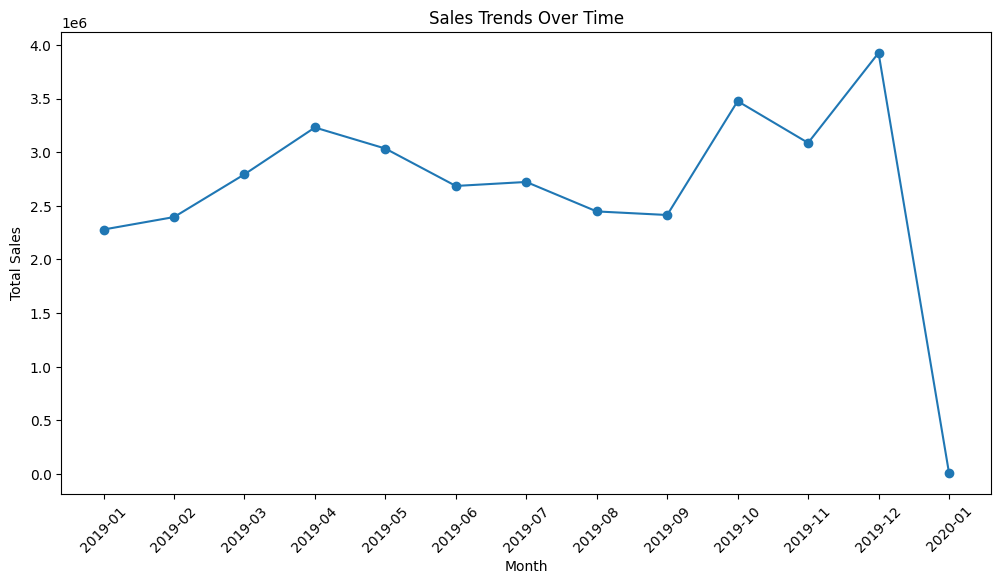

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'sales' with columns 'Order Date' and 'sales_amount'
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['month'] = sales['Order Date'].dt.to_period('M')
sales_over_time = sales.groupby('month')['Sales'].sum()

# Convert the Period index to strings for plotting
sales_over_time.index = sales_over_time.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.xticks(rotation=45)
plt.show()



**2) Which products are the best sellers?**

In [12]:
best_selling_products = sales.groupby('Order ID')['Quantity Ordered'].sum().nlargest(10)
print(best_selling_products)


Order ID
211097    9
226483    9
227096    9
224719    8
237807    8
241241    8
261442    8
278566    8
288689    8
291034    8
Name: Quantity Ordered, dtype: int64


**3) What is the most profitable product?**

In [13]:
most_profitable_product = sales.groupby('Order ID')['Price Each'].sum().idxmax()
print(f"The most profitable product is {most_profitable_product}")


The most profitable product is 202212


**4) What are the top five popular product demographics?**

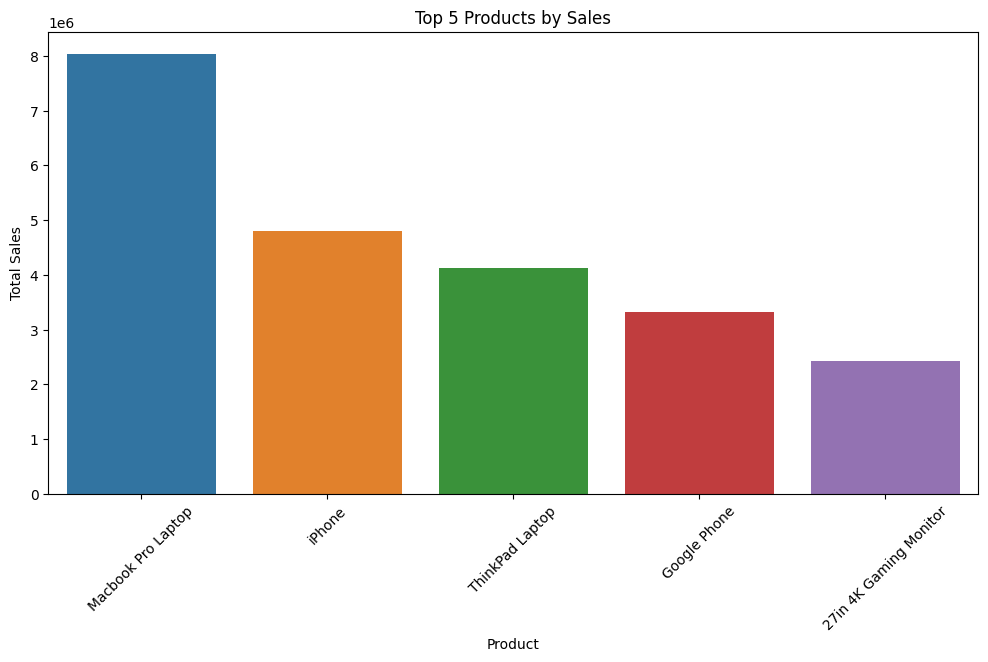

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'sales' with columns 'Product' and 'sales_amount'
# Group by 'Product' and sum the 'sales_amount' to find total sales per product
product_sales = sales.groupby('Product')['Sales'].sum().reset_index()

# Sort the products by total sales in descending order and get the top 4
top_5_products = product_sales.sort_values(by='Sales', ascending=False).head(5)

plt.figure(figsize=(12, 6))

sns.barplot(data=top_5_products, x='Product', y='Sales')
plt.title('Top 5 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**5) What are the best times of year to sell?**

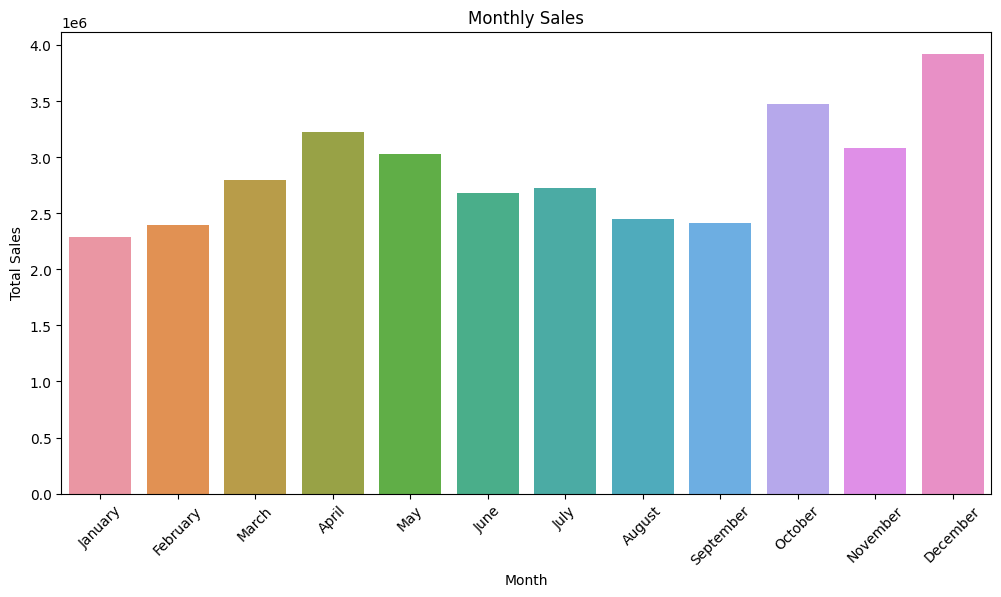

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'sales' with a 'Order Date' column
# Convert 'Order Date' to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Group by month and sum the 'Sales' column
monthly_sales = sales.groupby(sales['Order Date'].dt.strftime('%B'))['Sales'].sum()
monthly_sales = monthly_sales.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



**6) What are the best marketing channels?**

In [16]:
marketing_channels = sales.groupby('Product')['Sales'].sum().nlargest(10)
print(marketing_channels)




Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Sales, dtype: float64
